<a href="https://colab.research.google.com/github/Daryna-Ruban/Machine-learning/blob/main/%D0%A0%D1%83%D0%B1%D0%B0%D0%BD_%D0%9B%D0%916_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 6.
**1. Завантаження та підготовка даних:**

Необхідно побудувати регресійну модель на одному з вбудованих датасетів, доступних у
бібліотеці scikit-learn. Основна мета завдання — навчитися побудові регресійних
моделей та уникненню перенавчання (overfitting) шляхом застосування відповідних
технік.

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:

data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

df_styled = df.head(10).style.format(precision=2)

X = df.drop('Target', axis=1)
y = df['Target']

# Розділяємо на навчальну та тестову вибірки (80% на тренувальні, 20% на тестові)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


df_styled

Training set size: (16512, 8)
Test set size: (4128, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42
5,4.04,52.00,4.76,1.10,413.00,2.14,37.85,-122.25,2.70
6,3.66,52.00,4.93,0.95,1094.00,2.13,37.84,-122.25,2.99
7,3.12,52.00,4.80,1.06,1157.00,1.79,37.84,-122.25,2.41
8,2.08,42.00,4.29,1.12,1206.00,2.03,37.84,-122.26,2.27
9,3.69,52.00,4.97,0.99,1551.00,2.17,37.84,-122.25,2.61


In [16]:
# Створюємо лінійну регресійну модель
model = LinearRegression()

# Навчаємо модель на навчальних даних
model.fit(X_train, y_train)

# Прогнозуємо цільові значення на тестовій вибірці
y_pred = model.predict(X_test)

# Обчислюємо метрики якості моделі
mse = mean_squared_error(y_test, y_pred)  # Середня квадратична помилка
r2 = r2_score(y_test, y_pred)             # Коефіцієнт детермінації R²

# Виводимо результати
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.5558915986952444
R-squared (R²): 0.5757877060324508


In [18]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Обчислюємо метрики для навчальних і тестових даних
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Виведення результатів
print(f"Базова модель (Лінійна регресія):")
print(f"Навчальні дані: MSE = {train_mse:.2f}, R^2 = {train_r2:.2f}")
print(f"Тестові дані: MSE = {test_mse:.2f}, R^2 = {test_r2:.2f}")

Базова модель (Лінійна регресія):
Навчальні дані: MSE = 0.52, R^2 = 0.61
Тестові дані: MSE = 0.56, R^2 = 0.58


In [26]:
# Діапазон значень для параметра регуляризації
alphas = np.logspace(0, 4, 100)

# Ridge Regression
ridge_cv_scores = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(-scores.mean())

# Lasso Regression
lasso_cv_scores = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(-scores.mean())

# Вибір кращих моделей за допомогою перехресної валідації
best_ridge_alpha = alphas[np.argmin(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmin(lasso_cv_scores)]

print(f"Найкраще значення alpha для Ridge: {best_ridge_alpha}")
print(f"Найкраще значення alpha для Lasso: {best_lasso_alpha}")

# Повернемо відформатовану таблицю
df_styled

Найкраще значення alpha для Ridge: 8.497534359086444
Найкраще значення alpha для Lasso: 1.0


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42
5,4.04,52.00,4.76,1.10,413.00,2.14,37.85,-122.25,2.70
6,3.66,52.00,4.93,0.95,1094.00,2.13,37.84,-122.25,2.99
7,3.12,52.00,4.80,1.06,1157.00,1.79,37.84,-122.25,2.41
8,2.08,42.00,4.29,1.12,1206.00,2.03,37.84,-122.26,2.27
9,3.69,52.00,4.97,0.99,1551.00,2.17,37.84,-122.25,2.61


In [27]:
# Переоцінка моделей на тестових даних
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_y_test_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
lasso_y_test_pred = lasso_model.predict(X_test)

# Оцінка моделей з регуляризацією
ridge_test_mse = mean_squared_error(y_test, ridge_y_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_y_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_y_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_y_test_pred)

print(f"Ridge Regression: MSE = {ridge_test_mse:.2f}, R^2 = {ridge_test_r2:.2f}")
print(f"Lasso Regression: MSE = {lasso_test_mse:.2f}, R^2 = {lasso_test_r2:.2f}")

Ridge Regression: MSE = 0.56, R^2 = 0.58
Lasso Regression: MSE = 0.94, R^2 = 0.28


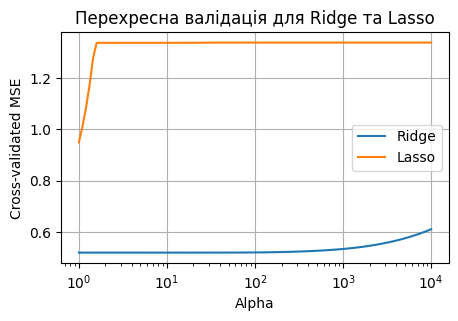

In [31]:
# Візуалізація результатів
plt.figure(figsize=(5, 3))
plt.semilogx(alphas, ridge_cv_scores, label='Ridge')
plt.semilogx(alphas, lasso_cv_scores, label='Lasso')
plt.xlabel('Alpha')
plt.ylabel('Cross-validated MSE')
plt.title('Перехресна валідація для Ridge та Lasso')
plt.legend()
plt.grid(True)
plt.show()

Висновок: Модель Ridge продемонструвала кращу узагальнюючу здатність, меншу помилку та вищу точність у порівнянні з Lasso. Ridge є оптимальним вибором для даного набору даних, тоді як Lasso може бути корисною для спрощення моделі, але з меншою ефективністю в цьому випадку.

# Завдання 2

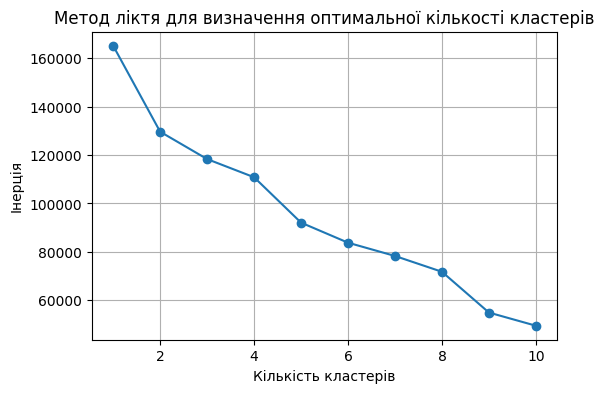

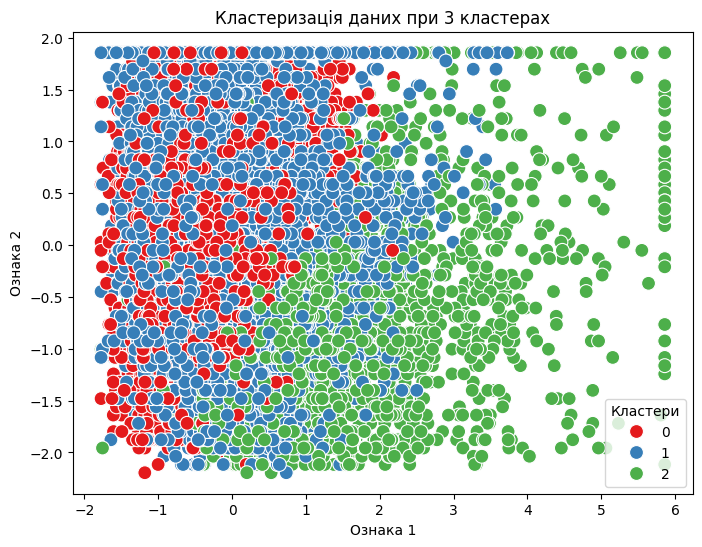

In [34]:
# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Застосування методу ліктя для визначення оптимальної кількості кластерів
inertia = []
K_range = range(1, 11)
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Метод ліктя для визначення оптимальної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.grid(True)
plt.show()

# Обираємо оптимальну кількість кластерів (наприклад, 3) на основі методу ліктя
optimal_K = 3
kmeans = KMeans(n_clusters=optimal_K, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Додаємо інформацію про кластери до DataFrame для подальшого аналізу
df['Cluster'] = clusters

# Візуалізація кластерів (якщо є 2 виміри)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='Set1', s=100)
plt.title(f'Кластеризація даних при {optimal_K} кластерах')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.legend(title='Кластери')
plt.show()

Висновок: Оптимальна кількість кластерів: 3. На графіку кластеризації можна бачити, що алгоритм поділив дані на три групи (кластерів) із чіткими межами. Різні кольори позначають різні кластери, а розподіл точок свідчить про наявність різних підгруп із подібними характеристиками.